In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("owid-covid-data 2.csv")


In [3]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [4]:
data.shape

(44785, 41)

In [5]:
temp = data['total_cases']
data.drop('total_cases',axis= 1, inplace=True)
data['total_cases'] = temp

In [6]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'total_cases'],
      dtype='object')

In [7]:
data.isnull().sum()

iso_code                             264
continent                            528
location                               0
date                                   0
new_cases                            803
new_cases_smoothed                  1585
total_deaths                         603
new_deaths                           803
new_deaths_smoothed                 1585
total_cases_per_million              867
new_cases_per_million                867
new_cases_smoothed_per_million      1650
total_deaths_per_million             867
new_deaths_per_million               867
new_deaths_smoothed_per_million     1650
new_tests                          29138
total_tests                        28763
total_tests_per_thousand           28763
new_tests_per_thousand             29138
new_tests_smoothed                 27217
new_tests_smoothed_per_thousand    27217
tests_per_case                     28636
positive_rate                      28252
tests_units                        26411
stringency_index

In [8]:
data.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_rate                      float64
tests_units

In [9]:
col = list(data.columns)
for col_name in col:
    if data[col_name].dtypes == 'object':
        data[col_name] = data[col_name].fillna(data[col_name].mode([0]))
    else:
        data[col_name] = data[col_name].fillna(data[col_name].mean())
        
        

In [10]:
data.isnull().sum()

iso_code                             264
continent                            528
location                               0
date                                   0
new_cases                              0
new_cases_smoothed                     0
total_deaths                           0
new_deaths                             0
new_deaths_smoothed                    0
total_cases_per_million                0
new_cases_per_million                  0
new_cases_smoothed_per_million         0
total_deaths_per_million               0
new_deaths_per_million                 0
new_deaths_smoothed_per_million        0
new_tests                              0
total_tests                            0
total_tests_per_thousand               0
new_tests_per_thousand                 0
new_tests_smoothed                     0
new_tests_smoothed_per_thousand        0
tests_per_case                         0
positive_rate                          0
tests_units                        26410
stringency_index

In [11]:
data.drop(columns = ['tests_units','iso_code','continent'], inplace =True)

In [12]:
data.columns

Index(['location', 'date', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 'female_smokers', 'male_smokers',
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index', 'total_cases'],
      dtype='object')

In [13]:
data.isnull().sum()

location                           0
date                               0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
new_tests                          0
total_tests                        0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
g

In [14]:
data['location'].value_counts()

location
Afghanistan       264
Denmark           264
Malaysia          264
Macedonia         264
Luxembourg        264
                 ... 
Western Sahara    147
Tajikistan        142
Comoros           141
Lesotho           128
Hong Kong          16
Name: count, Length: 212, dtype: int64

In [15]:
df= data[data['date']== "2020-09-19"]

In [16]:
max= df.sort_values(by = "total_cases" , ascending = False)
max

,location,date,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_cases
44520,World,2020-09-19,309076.0,288630.000,952724.0,5947.0,5242.143,3918.054,39.652,37.029,...,10.000000,233.070000,8.510000,6.434000,34.635000,60.130000,2.705000,72.58,0.72558,30540446.0
42376,United States,2020-09-19,50209.0,39911.286,198589.0,956.0,796.143,20316.052,151.688,120.577,...,1.200000,151.089000,10.790000,19.100000,24.600000,52.576272,2.770000,78.86,0.92400,6724667.0
18959,India,2020-09-19,93337.0,92575.714,85619.0,1247.0,1163.857,3846.375,67.635,67.084,...,21.200000,282.280000,10.390000,1.900000,20.600000,59.550000,0.530000,69.66,0.64000,5308014.0
6025,Brazil,2020-09-19,39797.0,30431.286,135793.0,858.0,771.000,21147.890,187.228,143.166,...,3.400000,177.961000,8.110000,10.100000,17.900000,52.576272,2.200000,75.88,0.75900,4495183.0
33573,Russia,2020-09-19,5905.0,5616.000,19195.0,134.0,118.571,7477.233,40.463,38.483,...,0.100000,431.297000,6.180000,23.400000,58.300000,52.576272,8.050000,72.58,0.81600,1091186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16547,Greenland,2020-09-19,0.0,0.000,0.0,0.0,0.000,246.600,0.000,0.000,...,12.029018,199.941000,2.160000,10.834007,32.637049,52.576272,3.115428,71.70,0.72558,14.0
13874,Falkland Islands,2020-09-19,0.0,0.000,0.0,0.0,0.000,3732.415,0.000,0.000,...,12.029018,251.347231,8.048869,10.834007,32.637049,52.576272,3.115428,81.44,0.72558,13.0
27613,Montserrat,2020-09-19,0.0,0.000,1.0,0.0,0.000,2600.520,0.000,0.000,...,12.029018,251.347231,8.048869,10.834007,32.637049,52.576272,3.115428,74.16,0.72558,13.0
43125,Vatican,2020-09-19,0.0,0.000,0.0,0.0,0.000,14833.127,0.000,0.000,...,12.029018,251.347231,8.048869,10.834007,32.637049,52.576272,3.115428,75.12,0.72558,12.0


In [17]:
max[1:6]

,location,date,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_cases
42376,United States,2020-09-19,50209.0,39911.286,198589.0,956.0,796.143,20316.052,151.688,120.577,...,1.2,151.089,10.79,19.1,24.600000,52.576272,2.77,78.86,0.924,6724667.0
18959,India,2020-09-19,93337.0,92575.714,85619.0,1247.0,1163.857,3846.375,67.635,67.084,...,21.2,282.280,10.39,1.9,20.600000,59.550000,0.53,69.66,0.640,5308014.0
6025,Brazil,2020-09-19,39797.0,30431.286,135793.0,858.0,771.000,21147.890,187.228,143.166,...,3.4,177.961,8.11,10.1,17.900000,52.576272,2.20,75.88,0.759,4495183.0
33573,Russia,2020-09-19,5905.0,5616.000,19195.0,134.0,118.571,7477.233,40.463,38.483,...,0.1,431.297,6.18,23.4,58.300000,52.576272,8.05,72.58,0.816,1091186.0
31940,Peru,2020-09-19,6314.0,5677.429,31283.0,137.0,116.143,22941.148,191.497,172.190,...,3.5,85.755,5.95,4.8,32.637049,52.576272,1.60,76.74,0.750,756412.0


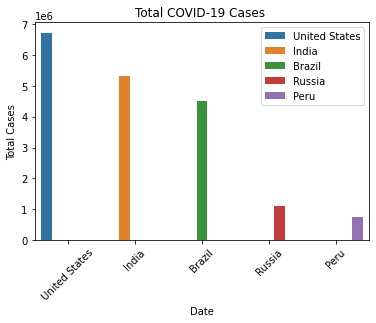

In [18]:

sns.barplot(data=max[1:6], x='location', y='total_cases', hue='location')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases ')
plt.xticks(rotation=45)
plt.legend()
plt.show()


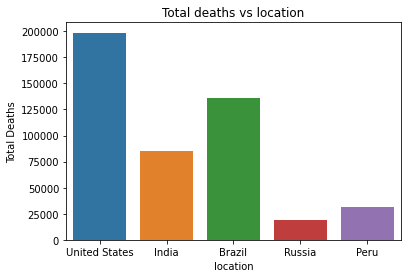

In [19]:
sns.barplot(data=max[1:6], x='location', y='total_deaths')
plt.xlabel('location')
plt.ylabel('Total Deaths')
plt.title('Total deaths vs location')
plt.show()



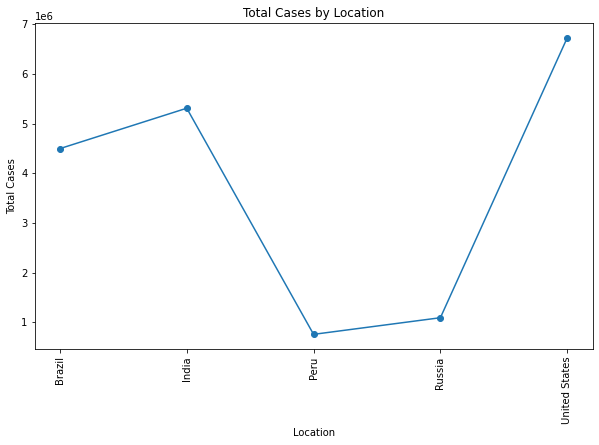

In [20]:

location_cases = max[1:6].groupby('location')['total_cases'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(location_cases['location'], location_cases['total_cases'], marker='o')
plt.xlabel('Location')
plt.ylabel('Total Cases')
plt.title('Total Cases by Location')
plt.xticks(rotation=90)
plt.show()


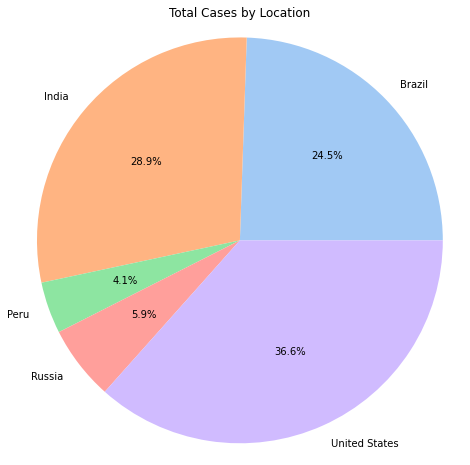

In [21]:

location_cases = max[1:6].groupby('location')['total_cases'].sum().reset_index()

plt.figure(figsize=(8, 8))


sns.set_palette('pastel')
plt.pie(location_cases['total_cases'], labels=location_cases['location'], autopct='%1.1f%%')
plt.axis('equal')  
plt.title('Total Cases by Location')
plt.show()


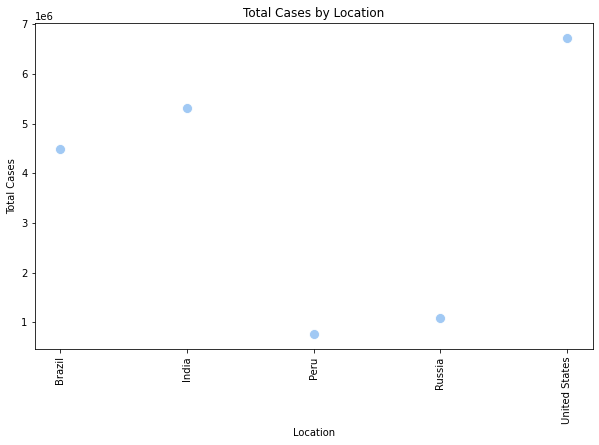

In [22]:

location_cases = max[1:6].groupby('location')['total_cases'].sum().reset_index()

plt.figure(figsize=(10,6))

sns.scatterplot(data=location_cases, x='location', y='total_cases', s=100)

plt.xlabel('Location')
plt.ylabel('Total Cases')
plt.title('Total Cases by Location')

plt.xticks(rotation=90)

plt.show()


In [23]:
data1 = data.loc[data['location'].isin(['India'])]
data1

,location,date,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_cases
18696,India,2019-12-31,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18697,India,2020-01-01,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18698,India,2020-01-02,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18699,India,2020-01-03,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18700,India,2020-01-04,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18955,India,2020-09-15,83809.0,92830.571000,80776.0,1054.0,1143.000000,3572.623,60.731,67.268000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,4930236.0
18956,India,2020-09-16,90123.0,92890.143000,82066.0,1290.0,1168.000000,3637.930,65.306,67.311000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,5020359.0
18957,India,2020-09-17,97894.0,93198.571000,83198.0,1132.0,1162.286000,3708.867,70.937,67.535000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,5118253.0
18958,India,2020-09-18,96424.0,93180.429000,84372.0,1174.0,1157.286000,3778.739,69.872,67.522000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,5214677.0


In [24]:
data1.dtypes

location                            object
date                                object
new_cases                          float64
new_cases_smoothed                 float64
total_deaths                       float64
new_deaths                         float64
new_deaths_smoothed                float64
total_cases_per_million            float64
new_cases_per_million              float64
new_cases_smoothed_per_million     float64
total_deaths_per_million           float64
new_deaths_per_million             float64
new_deaths_smoothed_per_million    float64
new_tests                          float64
total_tests                        float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_per_case                     float64
positive_rate                      float64
stringency_index                   float64
population                         float64
population_

In [25]:
data1['date']=data1['date'].astype('datetime64[ns]')
data1
 

C:\Users\Vasudha\AppData\Local\Temp/ipykernel_20640/2284572718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['date']=data1['date'].astype('datetime64[ns]')


,location,date,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_cases
18696,India,2019-12-31,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18697,India,2020-01-01,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18698,India,2020-01-02,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18699,India,2020-01-03,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18700,India,2020-01-04,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18955,India,2020-09-15,83809.0,92830.571000,80776.0,1054.0,1143.000000,3572.623,60.731,67.268000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,4930236.0
18956,India,2020-09-16,90123.0,92890.143000,82066.0,1290.0,1168.000000,3637.930,65.306,67.311000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,5020359.0
18957,India,2020-09-17,97894.0,93198.571000,83198.0,1132.0,1162.286000,3708.867,70.937,67.535000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,5118253.0
18958,India,2020-09-18,96424.0,93180.429000,84372.0,1174.0,1157.286000,3778.739,69.872,67.522000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,5214677.0


In [26]:
data1.dtypes

location                                   object
date                               datetime64[ns]
new_cases                                 float64
new_cases_smoothed                        float64
total_deaths                              float64
new_deaths                                float64
new_deaths_smoothed                       float64
total_cases_per_million                   float64
new_cases_per_million                     float64
new_cases_smoothed_per_million            float64
total_deaths_per_million                  float64
new_deaths_per_million                    float64
new_deaths_smoothed_per_million           float64
new_tests                                 float64
total_tests                               float64
total_tests_per_thousand                  float64
new_tests_per_thousand                    float64
new_tests_smoothed                        float64
new_tests_smoothed_per_thousand           float64
tests_per_case                            float64


In [27]:
data1.sort_values(by='date',inplace=True)

C:\Users\Vasudha\AppData\Local\Temp/ipykernel_20640/2755654457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.sort_values(by='date',inplace=True)


In [28]:
data1

,location,date,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,total_cases
18696,India,2019-12-31,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18697,India,2020-01-01,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18698,India,2020-01-02,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18699,India,2020-01-03,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
18700,India,2020-01-04,0.0,1372.258368,0.0,0.0,43.329499,0.000,0.000,23.160618,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18955,India,2020-09-15,83809.0,92830.571000,80776.0,1054.0,1143.000000,3572.623,60.731,67.268000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,4930236.0
18956,India,2020-09-16,90123.0,92890.143000,82066.0,1290.0,1168.000000,3637.930,65.306,67.311000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,5020359.0
18957,India,2020-09-17,97894.0,93198.571000,83198.0,1132.0,1162.286000,3708.867,70.937,67.535000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,5118253.0
18958,India,2020-09-18,96424.0,93180.429000,84372.0,1174.0,1157.286000,3778.739,69.872,67.522000,...,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.64,5214677.0


In [29]:
data1['date'].nunique()

264

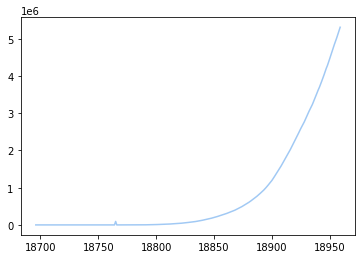

In [30]:
plt.plot(data1['total_cases'])
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

data1["date"] = data1["date"].astype('category')
data1["date"] = data1["date"].cat.codes

In [32]:
x = np.array(data1["date"]).reshape(-1,1)
y = np.array(data1["total_cases"]).reshape(-1,1)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, 18696 to 18959
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   location                         264 non-null    object        
 1   date                             264 non-null    datetime64[ns]
 2   new_cases                        264 non-null    float64       
 3   new_cases_smoothed               264 non-null    float64       
 4   total_deaths                     264 non-null    float64       
 5   new_deaths                       264 non-null    float64       
 6   new_deaths_smoothed              264 non-null    float64       
 7   total_cases_per_million          264 non-null    float64       
 8   new_cases_per_million            264 non-null    float64       
 9   new_cases_smoothed_per_million   264 non-null    float64       
 10  total_deaths_per_million         264 non-null    float64     

In [33]:
poly = PolynomialFeatures(degree = 3)
X = poly.fit_transform(x)

In [34]:
X

array([[1.00000000e+00, 1.57775040e+18, 2.48929632e+36, 3.92748827e+54],
       [1.00000000e+00, 1.57783680e+18, 2.48956897e+36, 3.92813353e+54],
       [1.00000000e+00, 1.57792320e+18, 2.48984163e+36, 3.92877886e+54],
       ...,
       [1.00000000e+00, 1.60030080e+18, 2.56096265e+36, 4.09831058e+54],
       [1.00000000e+00, 1.60038720e+18, 2.56123919e+36, 4.09897442e+54],
       [1.00000000e+00, 1.60047360e+18, 2.56151574e+36, 4.09963832e+54]])

In [35]:
lin = LinearRegression()
lin.fit(X,y)


LinearRegression()

In [36]:
lin.score(X,y)

0.6139030707134976

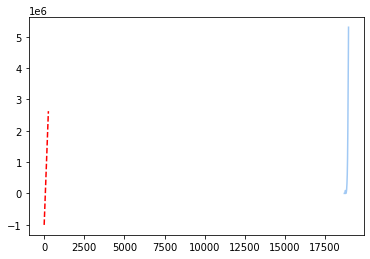

In [37]:
plt.plot(data1['total_cases'])
plt.plot(lin.predict(X), 'r--')
plt.show()

In [38]:
def date(value):
    temp = pd.DataFrame()
    temp['date'] = [value]
    temp['date'] = temp['date'].astype('datetime64[ns]')
    p = np.array(temp["date"]).reshape(-1,1)
    P = poly.fit_transform(p)
    return P

In [39]:
lin.predict(date('2023-09-29'))

array([[19055602.34699868]])

In [40]:
from datetime import datetime, timedelta

# ... (existing code)

def predict_cases(date_value):
    # Convert user input date to datetime format
    input_date = datetime.strptime(date_value, '%Y-%m-%d')

    # Predict cases for the next 24 hours
    next_day = input_date + timedelta(days=1)
    next_day_cases = lin.predict(date(next_day))

    # Predict cases for the next 1 week
    next_week = input_date + timedelta(weeks=1)
    next_week_cases = lin.predict(date(next_week))

    # Predict cases for the next 1 month
    next_month = input_date + timedelta(weeks=4)
    next_month_cases = lin.predict(date(next_month))

    return next_day_cases[0][0], next_week_cases[0][0], next_month_cases[0][0]

# Example usage:
user_input_date = '2023-09-29'
next_day_cases, next_week_cases, next_month_cases = predict_cases(user_input_date)
print("Predicted cases for the next 24 hours:", next_day_cases)
print("Predicted cases for the next 1 week:", next_week_cases)
print("Predicted cases for the next 1 month:", next_month_cases)


Predicted cases for the next 24 hours: 19071339.83650157
Predicted cases for the next 1 week: 19165798.449746832
Predicted cases for the next 1 month: 19496858.44132307
